In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df=pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df['Age'].isnull().any()

True

In [ ]:
df = df[['Survived','Pclass','Sex','Age']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df['Sex'] =  df['Sex'].replace({'male'  : '0','female' : '1'})

<ipython-input-17-adc2628358c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] =  df['Sex'].replace({'male'  : '0','female' : '1'})


In [ ]:
df.drop(['Age'], axis=1, inplace=True)

<ipython-input-18-df702bd030f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Age'], axis=1, inplace=True)


In [ ]:
df.head()

,Survived,Pclass,Sex
0,0,3,0
1,1,3,1
2,0,2,0
3,0,3,0
4,1,3,1


<Axes: xlabel='Sex', ylabel='count'>

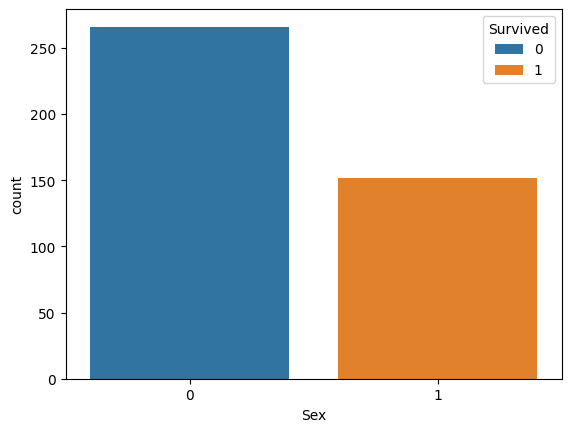

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x = df['Sex'],hue=df['Survived'])


<Axes: xlabel='Pclass', ylabel='count'>

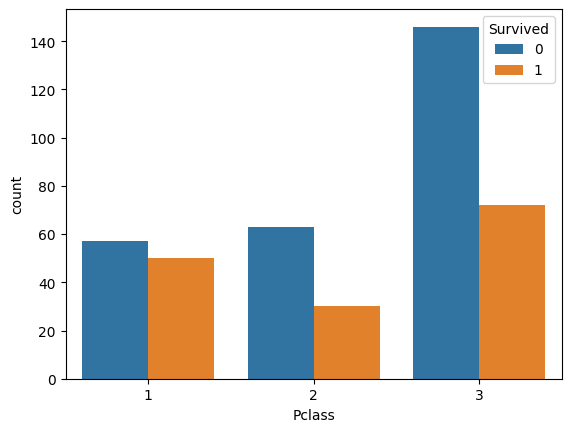

In [ ]:
sns.countplot(x = df['Pclass'],hue=df['Survived'])


In [ ]:
df['Sex'].unique()

array(['0', '1'], dtype=object)

In [ ]:
df['Pclass'].unique()

array([3, 2, 1])

In [ ]:
x = df[['Pclass','Sex']]
y = df['Survived']

In [ ]:
x

,Pclass,Sex
0,3,0
1,3,1
2,2,0
3,3,0
4,3,1
...,...,...
413,3,0
414,1,1
415,3,0
416,3,0


In [ ]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
x_train

,Pclass,Sex
66,3,1
393,2,0
317,2,0
123,3,0
86,3,1
...,...,...
330,2,1
182,1,1
210,3,0
12,1,1


In [ ]:
x_test

,Pclass,Sex
309,3,1
23,1,0
341,3,0
102,3,0
140,3,1
...,...,...
107,3,0
75,1,0
412,3,1
247,2,0


In [ ]:
y_train

396    0
22     1
274    0
74     1
202    0
      ..
214    1
343    1
375    1
337    0
253    0
Name: Survived, Length: 334, dtype: int64

In [ ]:
y_test

114    1
43     1
279    0
36     1
90     1
      ..
99     0
133    0
261    0
176    1
37     1
Name: Survived, Length: 84, dtype: int64

In [ ]:
model = LogisticRegression()


In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(pred,y_test)

In [ ]:
mse

0.4880952380952381

In [ ]:
accuracy = accuracy_score(pred, y_test)
accuracy

0.5119047619047619